<class 'matplotlib.axes._subplots.AxesSubplot'>


<AxesSubplot:label='82a672e7-48a1-4e84-9080-ae0bc2f8950f', xlabel='date', ylabel='Unemployment rate per month'>

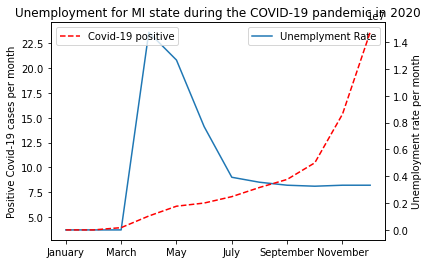

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df_unemployment = pd.read_csv('C:\MIUR.csv')
df_unemployment.columns = ['date', 'Unemplyment Rate']
df_covid_empty = pd.DataFrame({'date': ['01-2020', '02-2020'],
           'positive': [0 , 0]})
df_covid = df_covid_empty.append(pd.read_csv('C:\michigan-covid.csv'))

df_covid = df_covid[['date', 'positive']]
df_covid.columns = ['date', 'Covid-19 positive']


df_covid.date = pd.to_datetime(df_covid.date)
df_covid = df_covid.loc[(df_covid['date'] >= '2020-01-01')
                     & (df_covid['date'] < '2021-01-01')]
df_covid_month = df_covid.groupby(pd.Grouper(key='date', freq='1M')).sum() # groupby each 1 month
df_covid_month.index = df_covid_month.index.strftime('%B')

#df_unemployment['COVID19'] = df_covid_month['positive']


#print(df_covid_month)
#print(df_unemployment)

#ax = df_unemployment.plot(style=['b','y','g'])
#df_covid_month.plot(ax=ax, style=['b','y','g'], linestyle='--')


ax1 = df_unemployment.plot()

ax2 = ax1.twinx()
print(type(ax2))
ax2.spines['right'].set_position(('axes', 1.0))
ax1.set_title('Unemployment for MI state during the COVID-19 pandemic in 2020')

ax1.set_ylabel('Positive Covid-19 cases per month')
ax2.set_ylabel('Unemployment rate per month')
df_covid_month.plot(ax=ax2, color='red',  linestyle='--')

